<a href="https://colab.research.google.com/github/lleiva25/Project4/blob/Leslie_Leiva/2018_California__Agriculture_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1>Comparing Inception & Xception Machine Learning Models</h1>

In [304]:
url = 'https://docs.google.com/spreadsheets/d/12uetZGWujfeW3XR7THZ0swjWhSzWLE_ITbCQPU77kfE/edit#gid=0'

produce_list = ['Strawberry',
                'Dairy',
                'Almond',
                'Grapes',
                'Lettuce',
                'Rice']
inception_accuracy_list = [89.6,56.7,28.9,37.3,67.6,33.4]
xception_accuracy_list = [84.9,35,44.6,23,65.3,38.9]

inception_precision_list = [100,50,0,0,90,0]
xception_precision_list = [100,50,0,0,90,0]
inception_df = pd.DataFrame(
    {'Produce': produce_list,
    'Accuracy': inception_accuracy_list,
    'Precision': inception_precision_list}
)
xception_df = pd.DataFrame({
    'Produce': produce_list,
    'Accuracy': xception_accuracy_list,
    'Precision': xception_precision_list
})

df = pd.DataFrame(
    {'Produce': produce_list,
    'Inception Accuracy': inception_accuracy_list,
    'Xception Accuracy': xception_accuracy_list}
)

df1 = pd.DataFrame(
    {'Produce': produce_list,
    'Inception Precision': inception_precision_list,
    'Xception Precision': xception_precision_list}
)

In [305]:
inception_df.set_index('Produce', inplace=True)
xception_df.set_index('Produce', inplace=True)
df.set_index('Produce', inplace=True)
df1.set_index('Produce', inplace=True)

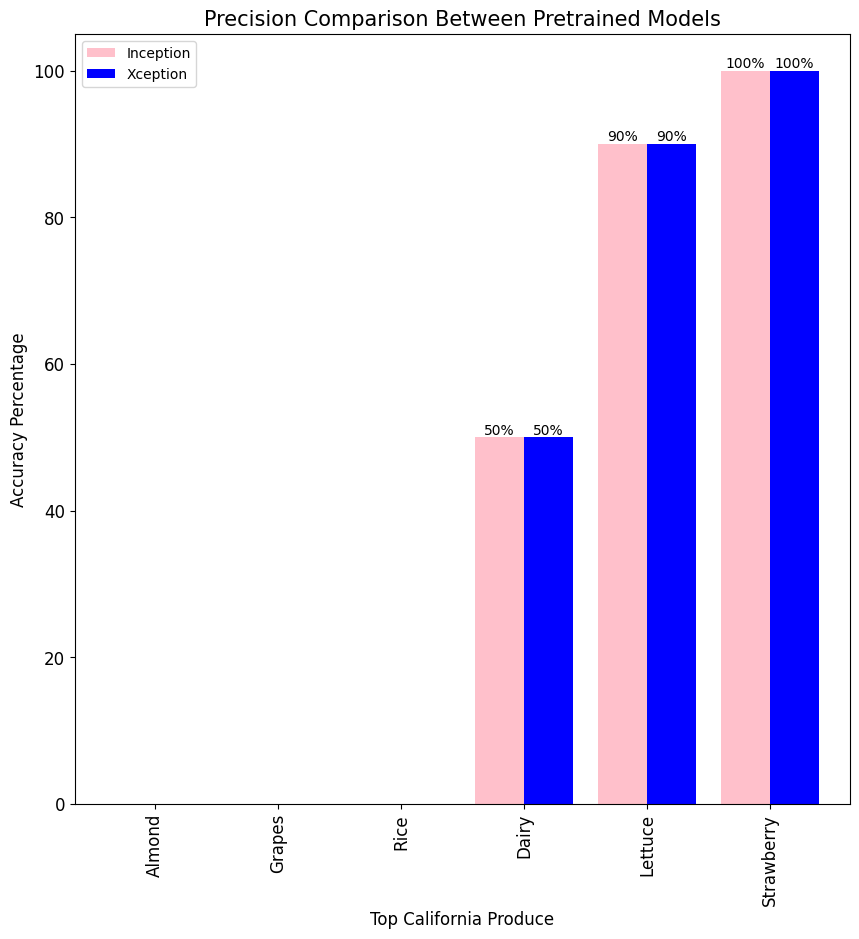

In [307]:
ax = df1.sort_values(by='Inception Precision').plot(kind='bar',color=['pink', 'blue'],
                                                  align='center',figsize=(10,10),width=0.8,
                                                  fontsize=12)

#Title graph
plt.title(f"Precision Comparison Between Pretrained Models",fontsize=15)

#Removing the Legend
ax.legend(labels = ['Inception','Xception'])

#Labeling x y axis
ax.set_ylabel('Accuracy Percentage',fontsize=12)
ax.set_xlabel('Top California Produce',fontsize=12)

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}%' if x>0 else'', label_type='edge',fontsize=10)

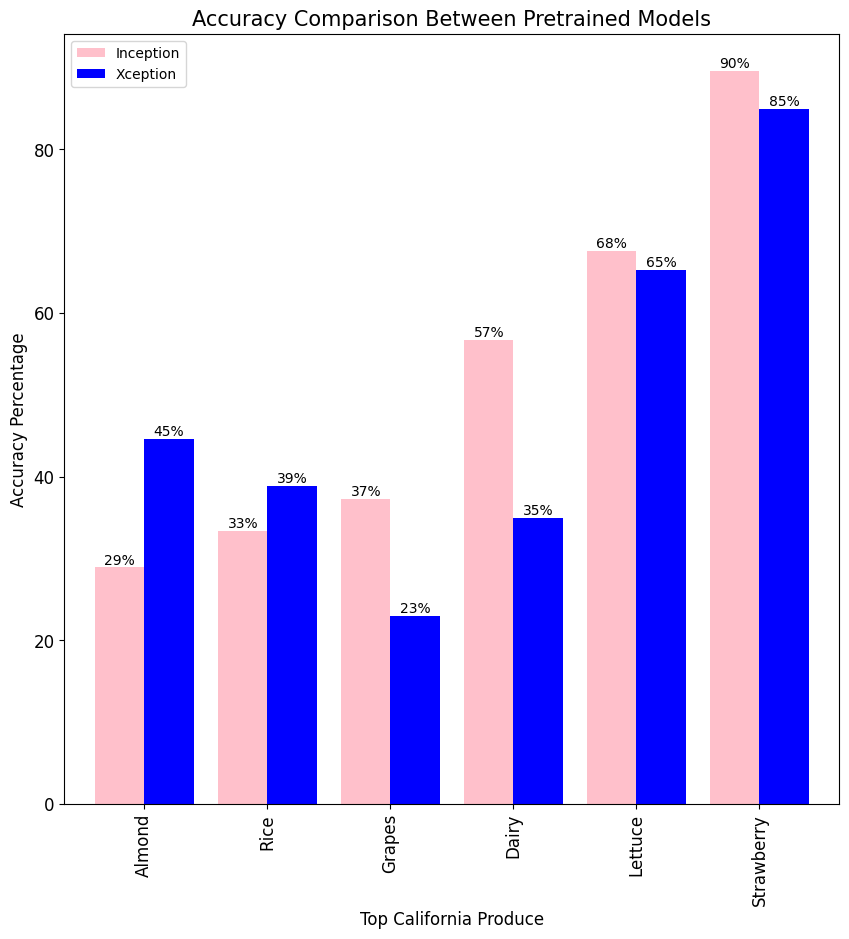

In [306]:
ax = df.sort_values(by='Inception Accuracy').plot(kind='bar',color=['pink', 'blue'],
                                                  align='center',figsize=(10,10),width=0.8,
                                                  fontsize=12)

#Title graph
plt.title(f"Accuracy Comparison Between Pretrained Models",fontsize=15)

#Removing the Legend
ax.legend(labels = ['Inception','Xception'])

#Labeling x y axis
ax.set_ylabel('Accuracy Percentage',fontsize=12)
ax.set_xlabel('Top California Produce',fontsize=12)

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}%' if x>0 else'', label_type='edge',fontsize=10)

<h1>California Agriculture Analysis</h1>

In [106]:
#Import dependencies
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#import plotly.express as px

In [170]:
#Path to file
path = "/content/drive/MyDrive/Project4/2018_California_Agriculture_Cleaned.csv"

#Read and turn csv to dataframe
df = pd.DataFrame(pd.read_csv(path,index_col=0))

#Drop unneeded columns
df = df.drop(columns=['Price P/I ($)','Year'])

#Create a dictionary with countyIds and their names in California
CA_county_codes = {
    1:'Alameda',
    2:'Alpine',
    3:'Amador',
    4:'Butte',
    5:'Calaveras',
    6:'Colusa',
    7:'Contra Costa',
    8:'Del Norte',
    9:'El Dorado',
    10:'Fresno',
    11:'Glenn',
    12:'Humboldt',
    13:'Imperial',
    14:'Inyo',
    15:'Kern',
    16:'Kings',
    17:'Lake',
    18:'Lassen',
    19:'Los Angeles',
    20:'Madera',
    21:'Marin',
    22:'Mariposa',
    23:'Mendocino',
    24:'Merced',
    25:'Modoc',
    26:'Mono',
    27:'Monterey',
    28:'Napa',
    29:'Nevada',
    30:'Orange',
    31:'Placer',
    32:'Plumas',
    33:'Riverside',
    34:'Sacramento',
    35:'San Benito',
    36:'San Bernardino',
    37:'San Diego',
    38:'San Francisco',
    39:'San Joaquin',
    40:'San Luis Obispo',
    41:'San Mateo',
    42:'Santa Barbara',
    43:'Santa Clara',
    44:'Santa Cruz',
    45:'Shasta',
    46:'Sierra',
    47:'Siskiyou',
    48:'Solano',
    49:'Sonoma',
    50:'Stanislaus',
    51:'Sutter',
    52:'Tehama',
    53:'Trinity',
    54:'Tulare',
    55:'Tuolumne',
    56:'Ventura',
    57:'Yolo',
    58:'Yuba',
}

#Create a new list for storying County names that associate with County ID
counties_list = []

#Loop through each County ID row to find the paired County Name
for id in df['CountyIds']:
  if  id in CA_county_codes.keys():
    counties_list.append(CA_county_codes[id])

#Create a new column for County Name
df['CountyName'] = counties_list

#Rearrange columns in df
df = df[['CountyName',
         'CountyIds',
         ' Crop Name',
         ' Production',
         ' Unit',
         ' Price P/U',
         'Total Value($)']]

#View df and information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 16 to 2113
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CountyName      339 non-null    object 
 1   CountyIds       339 non-null    int64  
 2    Crop Name      339 non-null    object 
 3    Production     339 non-null    float64
 4    Unit           339 non-null    object 
 5    Price P/U      339 non-null    float64
 6   Total Value($)  339 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 21.2+ KB


,CountyName,CountyIds,Crop Name,Production,Unit,Price P/U,Total Value($)
16,Contra Costa,7,ALMONDS ALL,32300.0,Tons,4812.32,1.554380e+08
17,El Dorado,9,ALMONDS ALL,50.0,Tons,4360.00,2.180000e+05
18,Glenn,11,ALMONDS ALL,72500.0,Tons,4494.33,3.258390e+08
19,Los Angeles,19,ALMONDS ALL,240000.0,Tons,4626.00,1.110240e+09
20,Marin,21,ALMONDS ALL,46700.0,Tons,4819.83,2.250860e+08


<h1>Agricultural Plots</h1>

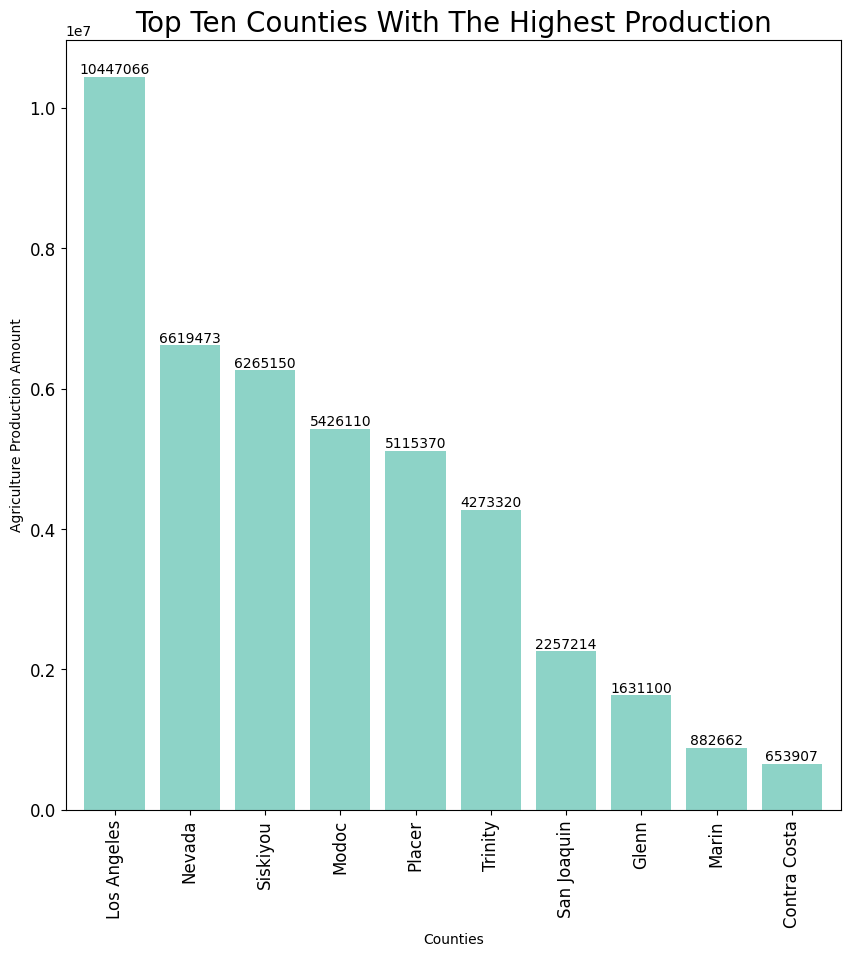

In [178]:
county_crop_total = df.groupby(['CountyName']).sum(numeric_only=True).drop(columns=['CountyIds']).sort_values(by=['CountyName'])
county_prod_total = county_crop_total.drop(columns=[county_crop_total.columns[1],county_crop_total.columns[2]]).sort_values(by=county_crop_total.columns[0],ascending=False).head(10)

ax = county_prod_total.plot.bar(figsize=(10,10),
                                width=0.8,
                                colormap='Set3',
                                fontsize=12,
                                align='center')

#Labeling x y axis
ax.set_ylabel('Agriculture Production Amount',fontsize=10)
ax.set_xlabel('Counties',fontsize=10)

#Title graph
plt.title(f"Top Ten Counties With The Highest Production",fontsize=20)

#Relabing y axis ticks
#ax.set_yticklabels(rate_sort_db['Site ID'].unique())

#Removing the Legend
ax.legend_ = None

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}' if x>0 else'', label_type='edge',fontsize=10)

In [225]:
#Reset index
county_10_crops = county_crop_total.reset_index()

#Find the unique values in the index and store to a list
counties10 = list(county_prod_total.index.unique())

#Loop through list to obtain values based on county
county_info_df = []

#Function that removes space in string
def remove(string):
    return string.replace(" ", "")

#Loop thorugh list to obtain dictionary of county
county_info_dict = {}

for county in counties10:
  #Find the rows that contain the counties in the top 10 production list
  temp_df =  top_ten_counties_df[top_ten_counties_df['CountyName'] == county].pivot_table(index='CountyName', columns=' Crop Name', values=[' Production',' Price P/U', 'Total Value($)'])

  #Create a df named after the county
  county_info_dict["df_{}".format(county)] = temp_df
  df_name = ("df_{}".format(county))
  df_name = remove(df_name)
  #Create a df named after the county
  df = pd.DataFrame.from_dict(temp_df)
  locals()[df_name] = df
  print("DataFrame: " +df_name)

  #Create Multiple Groupby
  df_price = df.groupby([' Crop']).sum().plot.bar(stacked=True, figsize=(10,10))

DataFrame: df_LosAngeles
DataFrame: df_Nevada
DataFrame: df_Siskiyou
DataFrame: df_Modoc
DataFrame: df_Placer
DataFrame: df_Trinity
DataFrame: df_SanJoaquin
DataFrame: df_Glenn
DataFrame: df_Marin
DataFrame: df_ContraCosta


In [216]:
df_LosAngeles

Price P/U                                       \
 Crop Name  ALMONDS ALL  APRICOTS ALL  ASPARAGUS UNSPECIFIED    
CountyName                                                      
Los Angeles       4626.0       2220.03                2992.02   

                                                                        \
 Crop Name  BERRIES BLUEBERRIES  BROCCOLI UNSPECIFIED  CHERRIES SWEET    
CountyName                                                               
Los Angeles              6804.93                 885.0         4181.01   

                                                              \
 Crop Name  CITRUS UNSPECIFIED  CORN SILAGE  CORN SWEET ALL    
CountyName                                                     
Los Angeles              657.99         49.0           438.0   

                               ... Total Value($)                           \
 Crop Name  COTTON LINT PIMA   ...  POMEGRANATES  SEED ALFALFA     SILAGE    
CountyName                     ...                                           
Los Angeles           2519.51  ...     35824000.0    10078000.0  8639000.0   

                                                                       \
 Crop Name     SQUASH  TANGERINES & MANDARINS  TOMATOES FRESH MARKET    
CountyName                                                              
Los Angeles  4824000.0             230056000.0             16320000.0   

                                                                        
 Crop Name  TOMATOES PROCESSING  WALNUTS ENGLISH   WHEAT ALL    YUCCA   
CountyName                                                              
Los Angeles          296344000.0       20005000.0  14075000.0  27000.0  

[1 rows x 150 columns]

In [300]:
for county in counties10:
  #Find the rows that contain the counties in the top 10 production list
  temp_df =  top_ten_counties_df[top_ten_counties_df['CountyName'] == county].pivot_table(index='CountyName', columns=' Crop Name', values=[' Production',' Price P/U', 'Total Value($)'])

  #Create a df named after the county
  county_info_dict["df_{}".format(county)] = temp_df
  df_name = ("df_{}".format(county))
  df_name = remove(df_name)
  #Create a df named after the county
  df = pd.DataFrame.from_dict(temp_df)
  locals()[df_name] = df
  print("DataFrame: " +df_name)

  #Create Multiple Groupby
  df_price = df.drop(columns=['Production','Total Value($)']).sort_values(by=' Production').head(10)
  df_price.groupby([' Crop']).sum().plot.bar(stacked=True, figsize=(10,10))

DataFrame: df_LosAngeles


KeyError: 'Production'

In [89]:

county_crop_production_df = pd.DataFrame(county_crop_total.drop(columns=[county_crop_total.columns[2],county_crop_total.columns[1]]))
county_crop_production_df.head()

county_crop_value_df = pd.DataFrame(county_crop_total.drop(columns=[county_crop_total.columns[0],county_crop_total.columns[1]]))
county_crop_value_df.head()

county_crop__df = pd.DataFrame(county_crop_total.drop(columns=[county_crop_total.columns[0],county_crop_total.columns[2]]))
county_crop_price_df.head()
#county_crop_avg.plot.bar(stacked=True, figsize=(10,10))
county_crop_total

county_crop_value_df.reset_index(inplace=True)
county_crop_value_df

,CountyName,Crop Name,Total Value($)
0,Alameda,GRAPES WINE,2.720500e+07
1,Alameda,HAY ALFALFA,1.090000e+05
2,Alameda,HAY OTHER UNSPECIFIED,1.090000e+06
3,Amador,HAY OTHER UNSPECIFIED,3.600000e+05
4,Calaveras,GRAPES WINE,2.479000e+07
...,...,...,...
334,Trinity,BROCCOLI FOOD SERVICE,7.544600e+07
335,Tuolumne,OLIVES,1.040000e+05
336,Tuolumne,GRAPES WINE,1.038600e+09
337,Tuolumne,HAY GRAIN,2.020000e+05
